In [19]:
# Representação de sistemas no espaço de estados
# Circuito RLC Série

In [20]:
import numpy as np
import control                   
import math
import cmath
import matplotlib.pyplot as plt
from scipy import linalg
import sympy as sp

In [21]:
# parametros do circuito
R = 5;
L = 5e-3;
C = 100e-6;

# Matrizes
A = [[0, 1/C], [-1/L, -R/L]];
A = np.matrix(A)
B = [[0], [1/L]];
B = np.matrix(B)
C = np.matrix('1, 0');
D = np.matrix('0');


# sistema no espaço de estados
sys = control.ss(A,B,C,D);
sys

A = [[    0. 10000.]
 [ -200. -1000.]]

B = [[  0.]
 [200.]]

C = [[1. 0.]]

D = [[0.]]

In [22]:
# convertendo para função de tranferência com a utilização da Equação
# G = C*inv(s*eye(2)-A)*B+D
# abordagem com variáveis simbolicas

s, t = sp.symbols('s t')

# Matrizes
A = sp.Matrix(A);
B = sp.Matrix(B);
C = sp.Matrix(C);
D = sp.Matrix(D);

I = np.eye(2);
Gs = C*(s*I-A)**-1*B+D;
Gs

Matrix([[-400000000.0/(-200.0*s*(1.0*s + 1000.0) - 400000000.0)]])

In [23]:
# Dividindo o numerador e o denominador de Gs por -200, chega se a seguinte função de transferência:
G = control.tf(2e6,[1, 1000, 2e6]);
G


        2e+06
--------------------
s^2 + 1000 s + 2e+06

In [24]:
# convertendo para função de tranferência com a utilização da função ss2tf
G2 = control.ss2tf(sys);
G2


-1.137e-13 s + 2e+06
--------------------
s^2 + 1000 s + 2e+06

In [25]:
# convertendo para o espaço de estados a partir da função de transferência
[[n]],[[d]] = control.tfdata(G2)
a1 = d[1];
a2 = d[2];

A = [[0, 1], [-a2, -a1]];
A = np.matrix(A);
B = [[0], [n[1]]];
B = np.matrix(B);
C = [1, 0];
D = 0;
sys2 = control.ss(A,B,C,D)
sys2

A = [[ 0.e+00  1.e+00]
 [-2.e+06 -1.e+03]]

B = [[      0.]
 [2000000.]]

C = [[1. 0.]]

D = [[0.]]

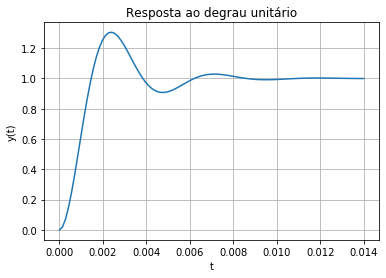

In [26]:
# resposta ao degrau unitário da primeira função de transferência                       
x, y = control.step_response(G);
plt.figure()
plt.plot(x, y)
plt.title("Resposta ao degrau unitário")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.grid(True)
plt.show()

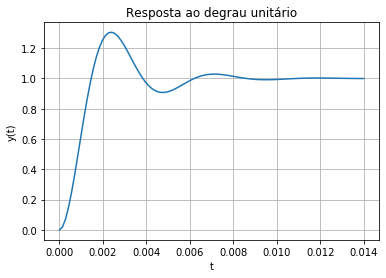

In [27]:
# resposta ao degrau unitário da segunda função de transferência                       
x, y = control.step_response(G2);
plt.figure()
plt.plot(x, y)
plt.title("Resposta ao degrau unitário")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.grid(True)
plt.show()

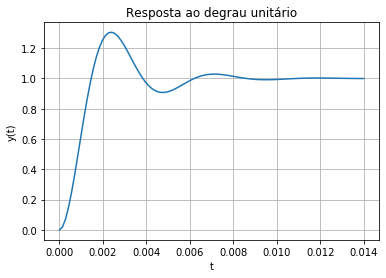

In [28]:
# resposta ao degrau unitário da primeira representação no espaço de estados                    
x, y = control.step_response(sys);
plt.figure()
plt.plot(x, y)
plt.title("Resposta ao degrau unitário")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.grid(True)
plt.show()

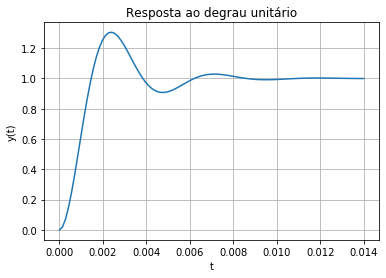

In [29]:
# resposta ao degrau unitário da segunda representação no espaço de estados                    
x, y = control.step_response(sys2);
plt.figure()
plt.plot(x, y)
plt.title("Resposta ao degrau unitário")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.grid(True)
plt.show()